# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import scipy.stats as stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [14]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [15]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

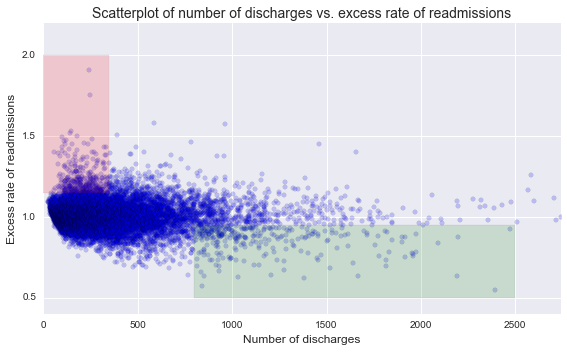

In [16]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [17]:
# Your turn

<div class="span5 alert alert-success">
<p>A. Do you agree with the above analysis and recommendations? Why or why not?</p>
</div>

I do not agree with the above analysis and recommendations because many inherent faults can be found when the report is analysed by section. 

- **Section A: Initial observations based on the plot above**

The scatter plot above displays ‘Number of Discharges’ on the x-axis against ‘Excess Rate of Readmissions’ on the y-axis. The graph is difficult to read, especially due to the author’s choice of bin size, which ranges from 0 - 2500 and introduces binning bias. In this case, the bin size is too small and runs the risk of oversimplifying the reality of the situation. 

Disregarding the issue of bin size however, the graph does show the rate of readmissions decreasing as the number of discharges increases.

- **Section B: Statistics**

The steps taken in the statistical analysis are unclear as well. Excess readmission rates have only been calculated for two groups, n < 100 and n > 1000. There is no explanation as to why 100 and 1000 were chosen as the two boundaries, so we must assume that 100 discharges is the threshold for a hospital/facility with a small capacity and 1000+ discharges signifies a hospital with a large capacity. An entire subset of the population has been ignored as well (n = 100 - 1000). 

With that in mind, the following analysis can help determine if the calculations are mathematically correct.

In [18]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [19]:
# Columns of interest - 'Number of Discharges' and 'Excess Readmission Ratio'
## 81 missing values in 'Excess Readmission Ratio' - drop missing values

updated_df = clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate', 'Number of Readmissions'])
updated_df.info()                                                  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [20]:
# Mean excess readmission rate (for discharges < 100)

df = updated_df
df100 = df[df['Number of Discharges'] < 100]
df100_mean = df100['Excess Readmission Ratio'].mean()

In [21]:
# Excess readmission ratio > 1 (for discharges < 100)

df100_excess = len(df100[df100['Excess Readmission Ratio'] > 1])

df100_ratio = df100_excess * 100 / len(df100)

print('For facilities with number of discharges < 100' + ':')
print('Mean Excess Readmission Rate = ' + str(df100_mean))
print('Excess Readmission Rate > 1 = ' + str(df100_ratio) + '%')

For facilities with number of discharges < 100:
Mean Excess Readmission Rate = 1.02261835017
Excess Readmission Rate > 1 = 63%


In [22]:
# Mean excess readmission rate (for discharges > 1000)

df1000 = df[df['Number of Discharges'] > 1000]
df1000_mean = df1000['Excess Readmission Ratio'].mean()

# Excess readmission ratio > 1 (for discharges > 1000)

df1000_excess = len(df1000[df1000['Excess Readmission Ratio'] > 1])

df1000_ratio = df1000_excess * 100 / len(df1000)

print('For facilities with number of discharges > 1000' + ':')
print('Mean Excess Readmission Rate = ' + str(df1000_mean))
print('Excess Readmission Rate > 1 = ' + str(df1000_ratio) + '%')

For facilities with number of discharges > 1000:
Mean Excess Readmission Rate = 0.978335421166
Excess Readmission Rate > 1 = 44%


As can be seen, the calculations are correct. 

- **Section C: Conclusions**

A statistically sound conclusion cannot be made without conducting significance tests. In the report, the following conclusions - that there is a significant correlation between the number of discharges and readmission rates and that smaller hospitals lack the resources necessary to ensure a low readmission rate - are surmised through calculations of means. No significance tests have been conducted, making the conclusions irresponsible. 

- **Section D: Regulatory policy recommendations**

Though the recommendations are reasonable, a major red flag here is that hospitals with small capacity are now defined as those with discharges < 300, while the whole report is based on boundaries of 100 and 1000, as discussed above. 

<div class="span5 alert alert-success">
<p>B. Provide support for your arguments and your own recommendations with a statistically sound analysis.</p>
</div>

1. Setup an appropriate hypothesis test.
2. Compute and report the observed significance value (or p-value).
3. Report statistical significance for $\alpha$ = .01. 
4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

# 1. Setup an appropriate hypothesis test.

$H_{o}$: There is no significant correlation between the number of discharges (hospital capacity) and readmission rates. 

$H_{a}$: There is a significant correlation between the number of discharges (hospital capacity) and readmission rates. 

α = 0.05

A Pearson (r) Correlation Coefficient is apt for testing this hypothesis because it measures the linear relationship between two variables.

# 2. Compute and report the observed significance value (or p-value).

In [23]:
# Pearson (r) Correlation Coefficient

var_discharges = updated_df['Number of Discharges']
var_readmissions = updated_df['Excess Readmission Ratio']

pearson_r = stats.pearsonr(var_discharges, var_readmissions)
pearson_r

(-0.097397943510793533, 1.222547377680967e-25)

The correlation coefficient (r) = -0.0974 and the p-value = 1.222547377680967e-25. The p-value is lower than the 0.05 significance value, leading to the rejection of the null hypothesis in favor of the alternate, which states that there is a significant correlation between the number of discharges and readmission rates. The Pearson's (r) value allows us to quantify this correlation, i.e. -0.0974.

# 3. Report statistical significance for α = .01.

P = 1.222547377680967e-25, which is significantly lower than the 0.01 significance level, leading once again to the rejection of the null hypothesis in favor of the alternate. 

# 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significance states that the difference found between two sample means is not due to sampling error, but is in fact, a realistic depiction of the true population mean. 

Practical significance aims to determine if the differences between samples are significant enough to have real meaning. 

In this example, there is definitely a difference between the two. The p-value of 1.222547377680967e-25 indicates that the results are statistically significant - there is a significant correlation between the number of discharges and readmission rates. The correlation coefficient is -0.0974 however, which is close to 0, signifying that there is barely a correlation between the two variables. 

As such, the recommendations regarding hospitals with small capacity should not be followed. Instead, further analysis is required to determine how the Center for Medicare and Medicaid Services can allocate its funds.

# 5A . Look at the scatter plot above. What are the advantages and disadvantages of using this plot to convey information?

A scatter plot is the best visualization technique for displaying the relationship between two variables. The major disadvantage of the plot above is that it fails to depict the true relationship between the variables. 

An advantage of the plot is that the two shaded areas alert the reader to trends on the graph, i.e. red showing a greater incidence of excess rate of readmissions and green showing a greater incidence of lower rates of readmissions. However, the actual meaning of the shaded regions is not necessarily intuitive or clear.

# 5B. Construct another plot that conveys the same information in a more direct manner.

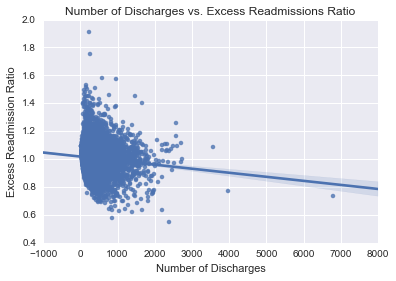

In [24]:
p = sns.regplot("Number of Discharges", "Excess Readmission Ratio", data=updated_df)
plt.title('Number of Discharges vs. Excess Readmissions Ratio')